In [1]:
from numpy import *
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def d_u(V,distance,m):
    a = np.sum(V, axis=0)-1
    b = np.sum(V, axis=1)-1
    y = np.array([[0.0 for i in range(m)] for i in range(m)])
    x = np.array([[0.0 for i in range(m)] for i in range(m)])
    for i in range(m):
        for j in range(m):
            x[i, j] = a[j]
    for i in range(m):
        for j in range(m):
            y[j, i] = b[j]
    
    c_1 = V[:, 1:m]
    c_0 = np.array([[0.0] for i in range(m)])
    c_0[:,0]=V[:,0]
    c = np.concatenate((c_1,c_0), axis=1)
    c = np.dot(distance,c)
    p = -A * (x + y) - D * c;
    return p;

In [3]:
def energy(V,distance):
    a = sum([x*x for x in (np.sum(V, axis=0)-1)])
    b = sum([x*x for x in (np.sum(V, axis=1)-1)])
    c_1 = V[:, 1:m]
    c_0 = np.array([[0.0] for i in range(m)])
    c_0[:,0]=V[:,0]
    c = np.concatenate((c_1, c_0), axis=1)
    c = np.sum(np.sum(np.multiply(V,np.dot(distance, c)), axis=0))
    e = 0.5*(A*(a+b)+D*c)
    return e

In [4]:
city= np.array([[0.7000,0.2000],[0.4000,0.3000],[0.5000,0.8000],[0.3000,0.4000],[0.1000,0.9000],[0.9000,0.4000],[0.8000,0.6000],[0.6000,0.9000],[0.3000,0.6000],[0.2000,0.8000]])
m = len(city)

distance = np.array([[0.0 for i in range(m)] for i in range(m)])
for i in range(m):
    for j in range(m):
        a = sqrt((city[i,0] - city[j,0]) * (city[i,0] - city[j,0]) + (city[i,1] - city[j,1]) * (city[i,1] - city[j,1]))
        distance[i,j] = a
        distance[j,i] = a

In [5]:
A = 300
D = 200
U0 = 0.1
step = 0.0001

delta=2*(np.random.random((m,m)))-1
U = U0*log(m-1)+delta
V = np.array([[0.0 for i in range(m)] for i in range(m)])
for i in range(m):
    for j in range(m):
        V[i,j]=(1+2/(1+exp(-2*(U[i,j]/U0)))-1)/2
num_iter = 10000

ener = np.array([0.0 for x in range(num_iter)])

In [8]:
for n in range(num_iter):
    dU = d_u(V, distance, m)
    U = U + dU * step
    
    for i in range(m):
        for j in range(m):
            V[i,j] = (1 + 2 / (1 + exp(-2 * (U[i,j] / U0))) - 1) / 2

    e=energy(V,distance)
    ener[n]=e

In [9]:
(row,col)= V.shape

V_H = np.array([0.0 for i in range(row)])

V_W = np.array([0 for i in range(row)])

for i in range(m):
    for j in range(m):
        if V[j,i]>V_H[i]:
            V_H[i]=V[j,i]
            V_W[i]=j
            
V_1 = np.array([[0 for i in range(row)] for i in range(col)])
for i in range(col):
    V_1[V_W[i],i]=1
    
C = np.sum(V_1, axis=0)
R = np.sum(V_1, axis=1)
test = 1
for i in range(m):
    if C[i]!=1 or R[i]!=1:
        test=0

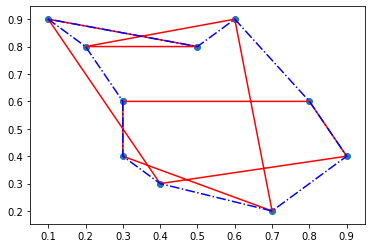

In [13]:
if test == 1:
    
    V_1H = np.array([0.0 for i in range(m)])
    V_1W = np.array([0 for i in range(m)])
    for i in range(m):
        for j in range(m):
            if V_1[j, i] > V_1H[i]:
                V_1H[i] = V_1[j, i]
                V_1W[i] = j
                
    city_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    V_0W = random.sample(list(city_i), 10)
    
    city_b = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]])
    city_f = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]])
    k=np.array([0,1,2,3,4,5,6,7,8,9])
    k=[city[i] for i in V_0W]
    for i in range(m):
        city_b[i]=k[i]
    j=np.array([0,1,2,3,4,5,6,7,8,9])
    j=[city[i] for i in V_1W]
    for i in range(m):
        city_f[i]=j[i]
        
    X_b=[]
    Y_b=[]
    X_f=[]
    Y_f=[]
    for i in range(m):
        X_b.append(city_b[i][0])
        Y_b.append(city_b[i][1])
        X_f.append(city_f[i][0])
        Y_f.append(city_f[i][1])
        
    X_b.append(city_b[0][0])
    Y_b.append(city_b[0][1])
    X_f.append(city_f[0][0])
    Y_f.append(city_f[0][1])
    plt.plot(X_b,Y_b,'r',X_f, Y_f, '-.b')
    plt.scatter(X_f,Y_f)
    plt.show()
else:
    print('No optimal path')